In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=60,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=48,
                           class_sep=2)

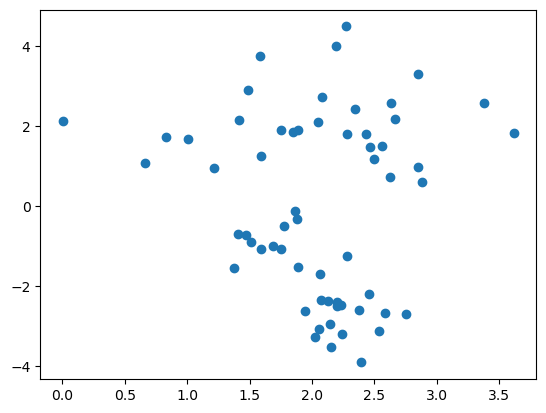

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [3]:
import numpy as np


def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [4]:
from scipy.cluster.hierarchy import fcluster, linkage

mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 2.06623799,  2.05251033],
       [ 2.03553813, -2.01360341]])

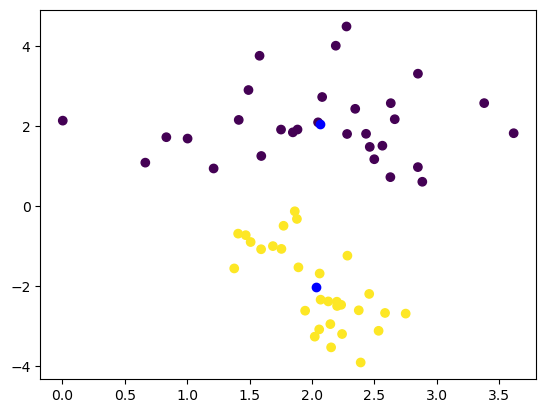

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='blue')

In [6]:
import math


class SOM:
    def __init__(self, n, c):
        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):
        return (50 - i) / 100

    def winner(self, weights, sample):
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):
        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + self.calculate_a(self.a[j]) * (sample[i] - weights[j][i])

        print(f'\nШаг для {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса после обновления:')
        print(weights)

        return weights

In [7]:
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[0.93489305, 1.0806629 ],
       [1.04593014, 0.96659381]])

In [8]:
som = SOM(n, C)
som

In [9]:
for i in range(m):
    sample = T[i]
    J = som.winner(weights, sample)
    weights = som.update(weights, sample, J)


Шаг для 0 кластера = 0.5
Веса после обновления:
[[1.91022536 0.84377741]
 [1.04593014 0.96659381]]

Шаг для 1 кластера = 0.5
Веса после обновления:
[[ 1.91022536  0.84377741]
 [ 1.53447281 -1.15028388]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[ 2.14593307 -1.48716402]
 [ 1.53447281 -1.15028388]]

Шаг для 1 кластера = 0.49
Веса после обновления:
[[ 2.14593307 -1.48716402]
 [ 1.86074322 -1.75945945]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[ 2.14593307 -1.48716402]
 [ 1.80879486  0.0030614 ]]

Шаг для 0 кластера = 0.48
Веса после обновления:
[[2.02061013 0.14535112]
 [1.80879486 0.0030614 ]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[2.02061013 0.14535112]
 [2.65921972 0.85758912]]

Шаг для 1 кластера = 0.46
Веса после обновления:
[[ 2.02061013  0.14535112]
 [ 2.0695593  -0.25497918]]

Шаг для 1 кластера = 0.45
Веса после обновления:
[[2.02061013 0.14535112]
 [2.23373074 0.67268671]]

Шаг для 0 кластера = 0.47
Веса после обновления:
[[2.2766709  0.78629351

In [10]:
s = X[0]
J = som.winner(weights, s)

print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: ")
print(weights)

Элемент принадлежит к 0 кластеру, на самом деле к 0 кластеру
Обученные веса: 
[[ 2.19640106 -1.74717385]
 [ 2.11415416 -1.50209734]]


In [11]:
predicted = np.array([som.winner(weights, s) for s in X])
predicted

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [12]:
y == predicted

array([ True, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True,  True, False])

In [13]:
from sklearn.metrics import accuracy_score

print(f'Точность кластеризации: {accuracy_score(y, predicted) * 100}%')

Точность кластеризации: 43.333333333333336%
